# AI Mini-Project


Name: **Varad Nerlekar**

PRN: **18070123085**

**Title:** Handwritten Text Classifier using CNN

**Dataset:** MNIST Dataset

**Link:** http://yann.lecun.com/exdb/mnist/

(Note: We are loading this dataset directly in the python file through keras)

**Description:** 
The MNIST database of handwritten digits has a training set of 60000 examples, and a test set of 10000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image i.e 28x28 pixels for easier model training.

**Part 1:** Importing Libraries

In [1]:
# Optional:
# !pip install tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**Part 2:** Loading the dataset

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

**Part 3:** Checking how the dataset looks like

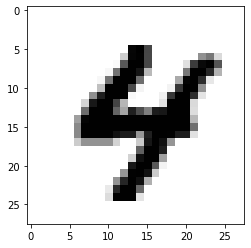

In [4]:
# Checking one of the entries in the dataset

plt.imshow(x_train[23085], cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[23085]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        249, 255, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The data varies on a scale of 0 to 255.

We require the data to be on a scale of 0 to 1 for training the model.

**Part 4:** Normalizing the data

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
x_train[23085]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Part 5:** Creating a CNN Model

In [9]:
# Feed Forward Model
model = tf.keras.models.Sequential()

# 1st Dense Layer - relu: for raw output greater than 0
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# 2nd Dense Layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Convert the data from 28x28 to 1x784
model.add(tf.keras.layers.Flatten())

# Final Dense Layer - softmax: for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

**Part 6:** Training the model

In [10]:
# Compile the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2504 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1160 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0941 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0813 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0707 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0619 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0547 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0485 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0424 - accuracy: 0.9864
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Accuracy = ", round(accuracy*100, 2), "%")
print("Loss = ", round(loss*100, 2), "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9733
Accuracy =  97.33 %
Loss =  9.44 %


**Part 7:** Prediction of the data

In [12]:
prediction = model.predict(x_test)

In [16]:
print("Test dataset is limited to 0-10000 images.")
n = input("Enter the index no.: ")
n = int(n)

Test dataset is limited to 0-10000 images.
Enter the index no.: 84


The image looks like this:


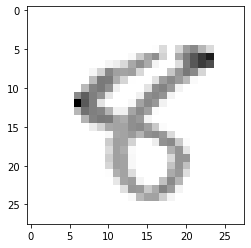

In [17]:
print("The image looks like this:")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [18]:
result = np.argmax(prediction[n])
print("The model predicted the above image as", result)

The model predicted the above image as 8


========= End of File =========